<a href="https://colab.research.google.com/github/SidU/LLMs-from-scratch/blob/main/MeanVarianceStabilityIntuition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

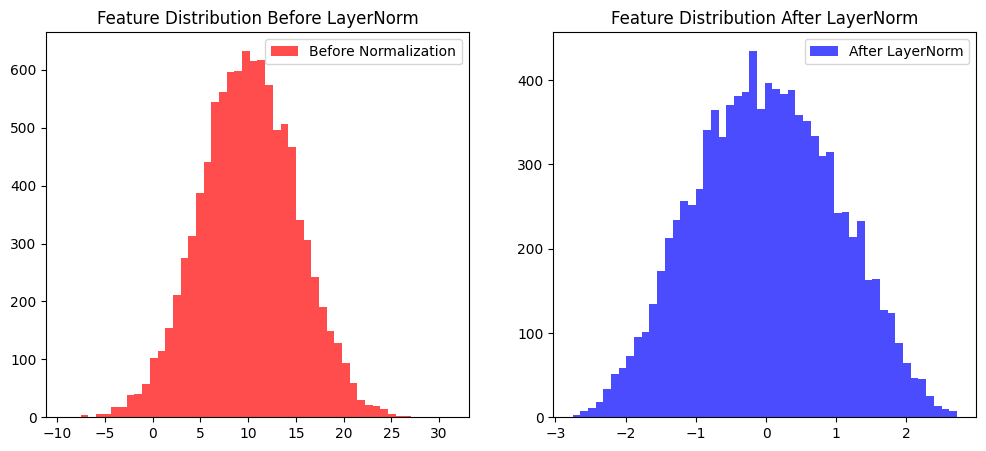

In [4]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

# Ensure reproducibility
torch.manual_seed(42)

# Generate random inputs with large variance and non-zero mean
x = torch.randn(1000, 10) * 5 + 10  # Shape: (1000 samples, 10 features)

# Apply LayerNorm
layer_norm = nn.LayerNorm(x.shape[1])  # Normalize across feature dimension
normalized_x = layer_norm(x)

# Convert tensors to NumPy for visualization
x_np = x.detach().numpy().flatten()
normalized_x_np = normalized_x.detach().numpy().flatten()

# Plot the distributions
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(x_np, bins=50, alpha=0.7, color='red', label="Before Normalization")
plt.legend()
plt.title("Feature Distribution Before LayerNorm")

plt.subplot(1, 2, 2)
plt.hist(normalized_x_np, bins=50, alpha=0.7, color='blue', label="After LayerNorm")
plt.legend()
plt.title("Feature Distribution After LayerNorm")

plt.show()


# **Effect of Layer Normalization on Training Stability**
## 📌 Goal:
This experiment compares **training stability with and without Layer Normalization (LayerNorm)** in a simple neural network.

## 🔍 **Why Does LayerNorm Matter?**
Neural networks can struggle with unstable activations, leading to:
- **Exploding gradients** (too large updates).
- **Vanishing gradients** (too small updates).
- **Slow convergence** due to inconsistent feature scaling.

LayerNorm **fixes this** by normalizing activations to have **mean 0 and variance 1**, making training smoother.

---

## ⚙️ **How the Experiment Works**
1. **We generate random input data (`X`)** with high variance.
2. **We train two neural networks:**
   - ✅ **With LayerNorm:** Normalized activations ensure stable updates.
   - ❌ **Without LayerNorm:** Training may be erratic due to varying feature scales.
3. **We track and plot the loss curves** to observe stability differences.

---

## 📈 **Expected Outcome**
- **Without LayerNorm:** The loss will fluctuate wildly, causing slower training.
- **With LayerNorm:** The loss will decrease **smoothly**, showing more stable convergence.

### 🔥 **Run the code below to see the effect in action!**

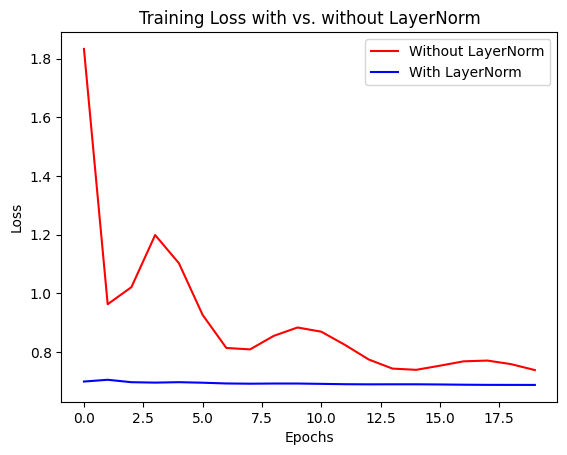

In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Generate some random training data
torch.manual_seed(42)
X = torch.randn(1000, 10) * 5 + 10  # Inputs with high variance
y = torch.randint(0, 2, (1000, 1)).float()  # Binary labels

# Define two simple neural networks (one with LayerNorm, one without)
class SimpleNN(nn.Module):
    def __init__(self, use_layernorm=False):
        super(SimpleNN, self).__init__()
        self.use_layernorm = use_layernorm
        self.fc1 = nn.Linear(10, 32)
        self.layernorm = nn.LayerNorm(32) if use_layernorm else nn.Identity()
        self.fc2 = nn.Linear(32, 1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.layernorm(x)  # Apply LayerNorm if enabled
        x = torch.relu(x)
        x = self.fc2(x)
        return x

# Create models
model_no_norm = SimpleNN(use_layernorm=False)
model_with_norm = SimpleNN(use_layernorm=True)

# Loss and Optimizer
criterion = nn.BCEWithLogitsLoss()
optimizer_no_norm = optim.Adam(model_no_norm.parameters(), lr=0.01)
optimizer_with_norm = optim.Adam(model_with_norm.parameters(), lr=0.01)

# Training function
def train_model(model, optimizer):
    losses = []
    for epoch in range(20):
        optimizer.zero_grad()
        outputs = model(X)
        loss = criterion(outputs, y)
        loss.backward()
        optimizer.step()
        losses.append(loss.item())
    return losses

# Train both models
losses_no_norm = train_model(model_no_norm, optimizer_no_norm)
losses_with_norm = train_model(model_with_norm, optimizer_with_norm)

# Plot the loss curves
plt.plot(losses_no_norm, label="Without LayerNorm", color='red')
plt.plot(losses_with_norm, label="With LayerNorm", color='blue')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss with vs. without LayerNorm")
plt.legend()
plt.show()
